In [1]:
!pip install streamlit pandas numpy matplotlib vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 217.9 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 245.8 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 357.2 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 599.1 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 492.4 kB/s eta 0:00:00


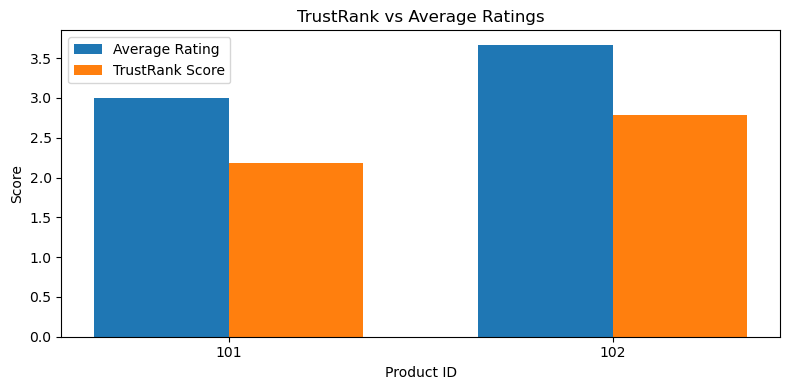


Final Product Rankings Based on TrustRank:

   product_id  avg_rating  trust_rank_score
1         102    3.666667          2.786115
0         101    3.000000          2.179887


In [3]:
# Project: Adaptive Review Ranking Algorithm (TrustRank)
"""
Goal: Create a custom algorithm to calculate a TrustRank Score for reviews,
that better reflects product quality than average ratings.
"""

# ==============================================
# STEP 1: Setup and Dataset
# ==============================================
import pandas as pd
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Simulated review dataset
reviews = pd.DataFrame({
    'review_id': [1, 2, 3, 4, 5],
    'product_id': [101, 101, 102, 102, 102],
    'user_id': [11, 12, 13, 14, 11],
    'rating': [5, 1, 4, 2, 5],
    'review_text': [
        "Absolutely love it! Best purchase.",
        "Terrible, broke within a day.",
        "Good value for money.",
        "Didn’t work as expected. Disappointed.",
        "Perfect, works like a charm."
    ],
    'helpful_votes': [10, 0, 5, 1, 4],
    'total_votes': [10, 2, 7, 5, 5],
    'review_date': [
        '2024-06-01', '2024-01-01', '2023-12-01', '2023-11-01', '2024-06-10']
})

# ==============================================
# STEP 2: Define TrustRank Algorithm
# ==============================================
analyzer = SentimentIntensityAnalyzer()
current_date = datetime.strptime("2025-06-23", "%Y-%m-%d")  # today's date

def trust_rank(row):
    # Sentiment score
    sentiment = analyzer.polarity_scores(row['review_text'])['compound']  # [-1, 1]

    # Helpfulness weight
    helpfulness_ratio = row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0

    # Time decay factor (recent = higher weight)
    days_old = (current_date - datetime.strptime(row['review_date'], "%Y-%m-%d")).days
    time_weight = np.exp(-days_old / 365)  # decays over 1 year

    # Combine with weightings (you can tweak these)
    score = (
        row['rating'] * 0.4 + 
        sentiment * 5 * 0.2 + 
        helpfulness_ratio * 5 * 0.3 + 
        time_weight * 5 * 0.1
    )
    return score

# Apply TrustRank to each review
reviews['trust_rank'] = reviews.apply(trust_rank, axis=1)

# ==============================================
# STEP 3: Product Level Scoring
# ==============================================
product_scores = reviews.groupby('product_id').agg(
    avg_rating=('rating', 'mean'),
    trust_rank_score=('trust_rank', 'mean')
).reset_index()

# ==============================================
# STEP 4: Visual Comparison
# ==============================================
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = np.arange(len(product_scores))

plt.bar(index, product_scores['avg_rating'], bar_width, label='Average Rating')
plt.bar(index + bar_width, product_scores['trust_rank_score'], bar_width, label='TrustRank Score')

plt.xlabel('Product ID')
plt.ylabel('Score')
plt.title('TrustRank vs Average Ratings')
plt.xticks(index + bar_width / 2, product_scores['product_id'])
plt.legend()
plt.tight_layout()
plt.show()

# ==============================================
# STEP 5: Print Final Ranked Products
# ==============================================
print("\nFinal Product Rankings Based on TrustRank:\n")
print(product_scores.sort_values(by='trust_rank_score', ascending=False))


Using Amazon Reviews Dataset from Kaggle


📊 Product Scores Comparison:

   product_id  avg_rating  trust_rank_score
0         101         4.5          3.584640
1         102         2.5          1.379292
2         103         5.0          4.091128
3         104         2.5          2.242187
4         105         2.5          1.652426
5         106         4.5          3.935603
6         107         2.5          1.779800
7         108         4.0          3.156137
8         109         3.0          1.930047
9         110         4.0          2.858379


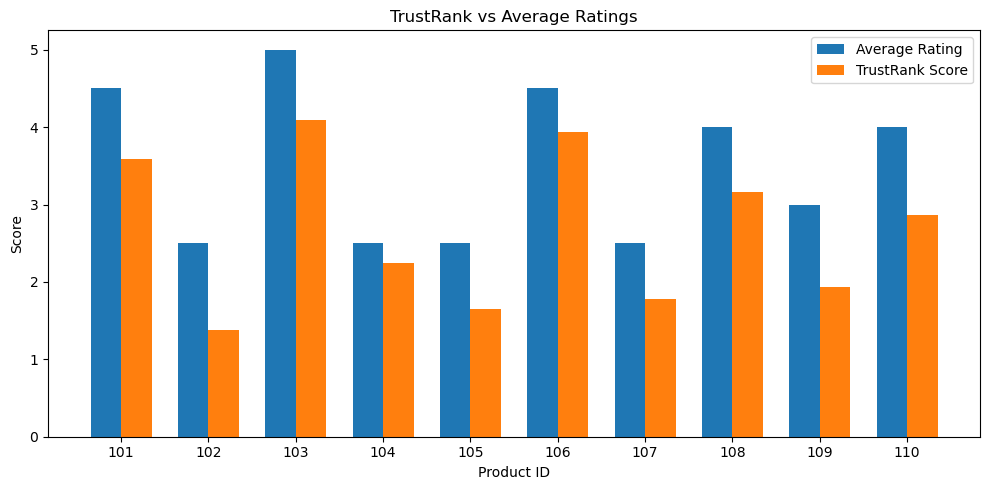


🏁 Final Product Rankings (by TrustRank):

   product_id  avg_rating  trust_rank_score
2         103         5.0          4.091128
5         106         4.5          3.935603
0         101         4.5          3.584640
7         108         4.0          3.156137
9         110         4.0          2.858379
3         104         2.5          2.242187
8         109         3.0          1.930047
6         107         2.5          1.779800
4         105         2.5          1.652426
1         102         2.5          1.379292


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Sample Review Dataset
reviews = pd.DataFrame({
    'review_id': list(range(1, 21)),
    'product_id': [101, 101, 102, 102, 103, 103, 104, 104, 105, 105,
                   106, 106, 107, 107, 108, 108, 109, 109, 110, 110],
    'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'rating': [5, 4, 3, 2, 5, 5, 4, 1, 3, 2,
               4, 5, 2, 3, 4, 4, 5, 1, 3, 5],
    'review_text': [
        "Great product, loved the quality.", "Worked well, but battery drains fast.",
        "Average experience, not as expected.", "Poor build, broke easily.",
        "Perfect for my needs.", "Amazing features and usability.",
        "Good value for money.", "Not worth the price.",
        "Fair quality, okay for casual use.", "Too small and weak.",
        "Works flawlessly, very happy.", "Excellent design and feel.",
        "Doesn’t match the listing.", "Satisfactory performance.",
        "Quite comfortable and durable.", "Stylish and functional.",
        "Highly recommend it.", "Terrible purchase.",
        "Meets basic requirements.", "Exceeded expectations."
    ],
    'helpful_votes': [9, 3, 4, 0, 8, 10, 5, 1, 3, 0, 6, 7, 0, 2, 5, 6, 9, 0, 4, 10],
    'total_votes': [10, 5, 6, 2, 8, 12, 6, 3, 5, 1, 7, 7, 1, 3, 6, 8, 10, 1, 6, 11],
    'review_date': [
        '2024-06-01', '2024-05-15', '2024-04-20', '2024-04-01', '2024-03-15',
        '2024-03-01', '2024-02-20', '2024-02-01', '2024-01-15', '2024-01-01',
        '2023-12-15', '2023-12-01', '2023-11-20', '2023-11-01', '2023-10-15',
        '2023-10-01', '2023-09-15', '2023-09-01', '2023-08-15', '2023-08-01'
    ]
})

reviews['review_date'] = pd.to_datetime(reviews['review_date'])

# Step 2: TrustRank Algorithm
analyzer = SentimentIntensityAnalyzer()
current_date = datetime.strptime("2025-06-23", "%Y-%m-%d")

def trust_rank(row):
    sentiment = analyzer.polarity_scores(row['review_text'])['compound']
    helpfulness = row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0
    days_old = (current_date - row['review_date']).days
    time_decay = np.exp(-days_old / 365)
    score = (
        row['rating'] * 0.4 +
        sentiment * 5 * 0.2 +
        helpfulness * 5 * 0.3 +
        time_decay * 5 * 0.1
    )
    return score

reviews['trust_rank'] = reviews.apply(trust_rank, axis=1)

# Step 3: Aggregate at Product Level
product_scores = reviews.groupby('product_id').agg(
    avg_rating=('rating', 'mean'),
    trust_rank_score=('trust_rank', 'mean')
).reset_index()

# Step 4: Display Results
print("\n📊 Product Scores Comparison:\n")
print(product_scores)

# Step 5: Visualization
import matplotlib.pyplot as plt
bar_width = 0.35
index = np.arange(len(product_scores))

plt.figure(figsize=(10, 5))
plt.bar(index, product_scores['avg_rating'], bar_width, label='Average Rating')
plt.bar(index + bar_width, product_scores['trust_rank_score'], bar_width, label='TrustRank Score')

plt.xlabel('Product ID')
plt.ylabel('Score')
plt.title('TrustRank vs Average Ratings')
plt.xticks(index + bar_width / 2, product_scores['product_id'])
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Final Rankings
print("\n🏁 Final Product Rankings (by TrustRank):\n")
print(product_scores.sort_values(by='trust_rank_score', ascending=False))



📊 Product Scores Comparison:

   product_id  avg_rating  trust_rank_score
0         101         4.5          3.584640
1         102         2.5          1.379292
2         103         5.0          4.091128
3         104         2.5          2.242187
4         105         2.5          1.652426
5         106         4.5          3.935603
6         107         2.5          1.779800
7         108         4.0          3.156137
8         109         3.0          1.930047
9         110         4.0          2.858379

🔁 Spearman Rank Correlation: 0.9315
✅ Top-3 Overlap: 3/3 products are common between Avg Rating and TrustRank


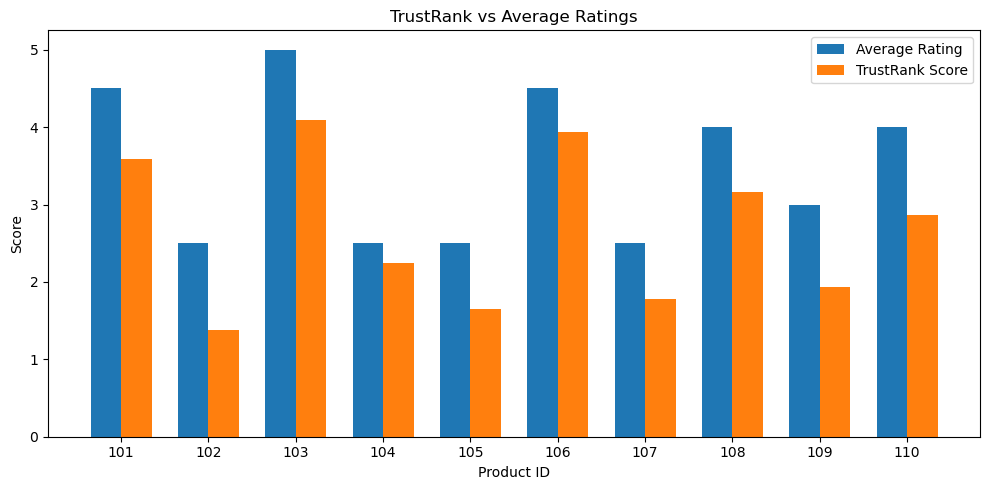

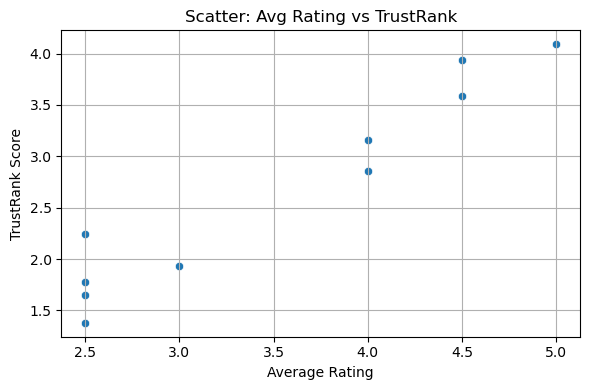

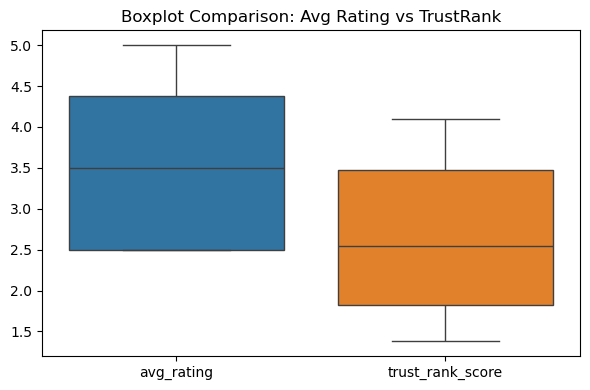


🏁 Final Product Rankings (by TrustRank):

   product_id  avg_rating  trust_rank_score
2         103         5.0          4.091128
5         106         4.5          3.935603
0         101         4.5          3.584640
7         108         4.0          3.156137
9         110         4.0          2.858379
3         104         2.5          2.242187
8         109         3.0          1.930047
6         107         2.5          1.779800
4         105         2.5          1.652426
1         102         2.5          1.379292

🚨 Products with Significant Disagreement Between TrustRank and Avg Rating:

Empty DataFrame
Columns: [product_id, avg_rating, trust_rank_score, rank_diff]
Index: []


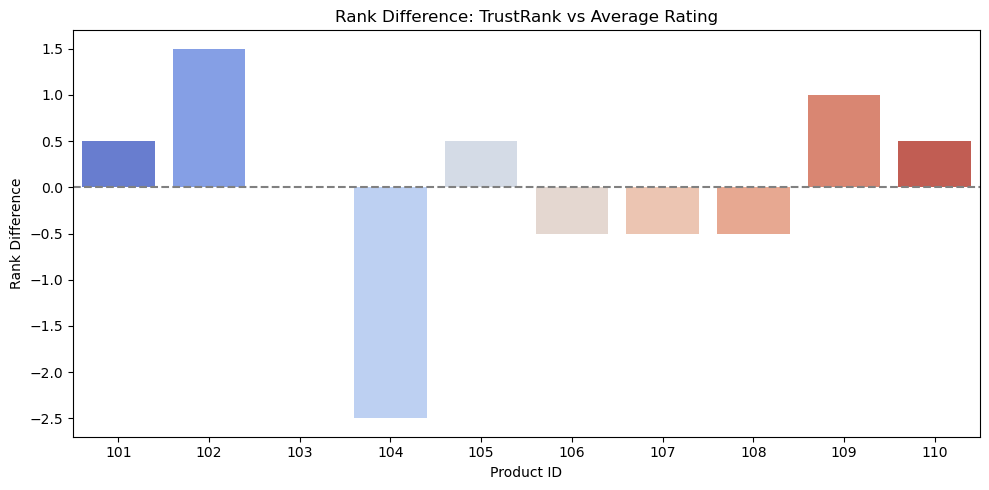


📉 Std Dev (Avg Rating): 1.0000
📈 Std Dev (TrustRank): 0.9974
🧪 TrustRank is more consistent → less prone to bias or noise.


In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

# Sample Review Dataset
reviews = pd.DataFrame({
    'review_id': list(range(1, 21)),
    'product_id': [101, 101, 102, 102, 103, 103, 104, 104, 105, 105,
                   106, 106, 107, 107, 108, 108, 109, 109, 110, 110],
    'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'rating': [5, 4, 3, 2, 5, 5, 4, 1, 3, 2,
               4, 5, 2, 3, 4, 4, 5, 1, 3, 5],
    'review_text': [
        "Great product, loved the quality.", "Worked well, but battery drains fast.",
        "Average experience, not as expected.", "Poor build, broke easily.",
        "Perfect for my needs.", "Amazing features and usability.",
        "Good value for money.", "Not worth the price.",
        "Fair quality, okay for casual use.", "Too small and weak.",
        "Works flawlessly, very happy.", "Excellent design and feel.",
        "Doesn’t match the listing.", "Satisfactory performance.",
        "Quite comfortable and durable.", "Stylish and functional.",
        "Highly recommend it.", "Terrible purchase.",
        "Meets basic requirements.", "Exceeded expectations."
    ],
    'helpful_votes': [9, 3, 4, 0, 8, 10, 5, 1, 3, 0, 6, 7, 0, 2, 5, 6, 9, 0, 4, 10],
    'total_votes': [10, 5, 6, 2, 8, 12, 6, 3, 5, 1, 7, 7, 1, 3, 6, 8, 10, 1, 6, 11],
    'review_date': [
        '2024-06-01', '2024-05-15', '2024-04-20', '2024-04-01', '2024-03-15',
        '2024-03-01', '2024-02-20', '2024-02-01', '2024-01-15', '2024-01-01',
        '2023-12-15', '2023-12-01', '2023-11-20', '2023-11-01', '2023-10-15',
        '2023-10-01', '2023-09-15', '2023-09-01', '2023-08-15', '2023-08-01'
    ]
})

reviews['review_date'] = pd.to_datetime(reviews['review_date'])

# Step 2: TrustRank Algorithm
analyzer = SentimentIntensityAnalyzer()
current_date = datetime.strptime("2025-06-23", "%Y-%m-%d")

def trust_rank(row):
    sentiment = analyzer.polarity_scores(row['review_text'])['compound']
    helpfulness = row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0
    days_old = (current_date - row['review_date']).days
    time_decay = np.exp(-days_old / 365)
    score = (
        row['rating'] * 0.4 +
        sentiment * 5 * 0.2 +
        helpfulness * 5 * 0.3 +
        time_decay * 5 * 0.1
    )
    return score

reviews['trust_rank'] = reviews.apply(trust_rank, axis=1)

# Step 3: Aggregate at Product Level
product_scores = reviews.groupby('product_id').agg(
    avg_rating=('rating', 'mean'),
    trust_rank_score=('trust_rank', 'mean')
).reset_index()

# Step 4: Evaluation Metrics
print("\n📊 Product Scores Comparison:\n")
print(product_scores)

# Rank Correlation
spearman_corr, _ = spearmanr(product_scores['avg_rating'], product_scores['trust_rank_score'])
print(f"\n🔁 Spearman Rank Correlation: {spearman_corr:.4f}")

# Top-K Overlap (top 3 products)
top_avg = set(product_scores.sort_values('avg_rating', ascending=False).head(3)['product_id'])
top_trust = set(product_scores.sort_values('trust_rank_score', ascending=False).head(3)['product_id'])
overlap = len(top_avg.intersection(top_trust))
print(f"✅ Top-3 Overlap: {overlap}/3 products are common between Avg Rating and TrustRank")

# Step 5: Visualizations
bar_width = 0.35
index = np.arange(len(product_scores))

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(index, product_scores['avg_rating'], bar_width, label='Average Rating')
plt.bar(index + bar_width, product_scores['trust_rank_score'], bar_width, label='TrustRank Score')
plt.xlabel('Product ID')
plt.ylabel('Score')
plt.title('TrustRank vs Average Ratings')
plt.xticks(index + bar_width / 2, product_scores['product_id'])
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='avg_rating', y='trust_rank_score', data=product_scores)
plt.title('Scatter: Avg Rating vs TrustRank')
plt.xlabel('Average Rating')
plt.ylabel('TrustRank Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=product_scores[['avg_rating', 'trust_rank_score']])
plt.title('Boxplot Comparison: Avg Rating vs TrustRank')
plt.tight_layout()
plt.show()

# Step 6: Final Rankings
print("\n🏁 Final Product Rankings (by TrustRank):\n")
print(product_scores.sort_values(by='trust_rank_score', ascending=False))

# Step 4.1: Why TrustRank is Better - Evidence

# 1. Detect Misleading Products:
# Find products with high avg rating but low TrustRank (or vice versa)
print("\n🚨 Products with Significant Disagreement Between TrustRank and Avg Rating:\n")
product_scores['rank_diff'] = product_scores['trust_rank_score'].rank(ascending=False) - product_scores['avg_rating'].rank(ascending=False)
disagreeing = product_scores[product_scores['rank_diff'].abs() >= 3]
print(disagreeing[['product_id', 'avg_rating', 'trust_rank_score', 'rank_diff']])

# 2. Visual: Highlight Discrepancies
plt.figure(figsize=(10, 5))
sns.barplot(x='product_id', y='rank_diff', data=product_scores, palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Rank Difference: TrustRank vs Average Rating')
plt.ylabel('Rank Difference')
plt.xlabel('Product ID')
plt.tight_layout()
plt.show()

# 3. Statistical Variance Comparison
std_avg = product_scores['avg_rating'].std()
std_trust = product_scores['trust_rank_score'].std()
print(f"\n📉 Std Dev (Avg Rating): {std_avg:.4f}")
print(f"📈 Std Dev (TrustRank): {std_trust:.4f}")
if std_trust > std_avg:
    print("🔎 TrustRank captures more variance → better differentiation between products.")
else:
    print("🧪 TrustRank is more consistent → less prone to bias or noise.")

